In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_flight = pd.read_csv('AirIndia (International).csv')

In [3]:
df_flight.head()

,Month,DEPARTURES\n,HOURS\n,KILOMETRE\n(TH),PASSENGERS CARRIED\n,PASSENGER KMS.PERFORMED\n(TH),AVAILABLE SEAT KILOMETRE\n(TH),PAX.LOAD FACTOR (IN %),FY
0,APR,2727.0,12989.0,9552.0,394072.0,1705993.0,2361391.0,72.2,FY14
1,MAY,2733.0,13053.0,9868.0,415697.0,1841507.0,2439514.0,75.5,FY14
2,JUNE,2777.0,13339.0,9744.0,420919.0,1848800.0,2408821.0,76.8,FY14
3,JULY,2813.0,13430.0,9916.0,372662.0,1734592.0,2451380.0,70.8,FY14
4,AUG,2844.0,13731.0,10037.0,424706.0,1983795.0,2481327.0,79.9,FY14


In [4]:
df_flight.tail()

,Month,DEPARTURES\n,HOURS\n,KILOMETRE\n(TH),PASSENGERS CARRIED\n,PASSENGER KMS.PERFORMED\n(TH),AVAILABLE SEAT KILOMETRE\n(TH),PAX.LOAD FACTOR (IN %),FY
115,NOV,3414.0,21624.2,16098.5,599741.0,3251503.1,3955215.8,82.2,FY23
116,DEC,3496.0,22396.8,16639.6,642438.0,3533993.5,4131499.3,85.5,FY23
117,JAN,3503.0,23025.3,17147.2,649594.0,3680735.7,4266836.6,86.3,FY23
118,FEB,3220.0,21208.5,15906.7,599914.0,3415406.3,3973160.5,86,FY23
119,MAR,NaN,NaN,NaN,NaN,NaN,NaN,,FY23


In [5]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Month                          120 non-null    object 
 1   DEPARTURES
                    119 non-null    float64
 2   HOURS
                         119 non-null    float64
 3   KILOMETRE
(TH)                 119 non-null    float64
 4   PASSENGERS CARRIED
            119 non-null    float64
 5   PASSENGER KMS.PERFORMED
(TH)   119 non-null    float64
 6   AVAILABLE SEAT KILOMETRE
(TH)  119 non-null    float64
 7    PAX.LOAD FACTOR (IN %)        120 non-null    object 
 8   FY                             120 non-null    object 
dtypes: float64(6), object(3)
memory usage: 8.6+ KB


In [6]:
df_flight.isnull().sum()

Month                             0
DEPARTURES\n                      1
HOURS\n                           1
KILOMETRE\n(TH)                   1
PASSENGERS CARRIED\n              1
PASSENGER KMS.PERFORMED\n(TH)     1
AVAILABLE SEAT KILOMETRE\n(TH)    1
 PAX.LOAD FACTOR (IN %)           0
FY                                0
dtype: int64

In [9]:
cat_cols = df_flight.columns[df_flight.dtypes == object] 
num_cols = df_flight.select_dtypes(include=np.number).columns.tolist() 

In [11]:
print("The categorical columns are", cat_cols)
print("The numerical columns are", num_cols)

The categorical columns are Index(['Month', ' PAX.LOAD FACTOR (IN %)', 'FY'], dtype='object')
The numerical columns are ['DEPARTURES\n', 'HOURS\n', 'KILOMETRE\n(TH)', 'PASSENGERS CARRIED\n', 'PASSENGER KMS.PERFORMED\n(TH)', 'AVAILABLE SEAT KILOMETRE\n(TH)']


In [ ]:
## We see that PAX.LOAD FACTOR is of the wrong data type; Time to change it!!

In [19]:
df_flight[" PAX.LOAD FACTOR (IN %)"] = pd.to_numeric(df_flight[" PAX.LOAD FACTOR (IN %)"], downcast="float", errors="coerce")

In [21]:
df_flight[" PAX.LOAD FACTOR (IN %)"].dtype

dtype('float32')

In [ ]:
## Exploratory Data Analysis

In [ ]:
### Univariate Analysis

DEPARTURES



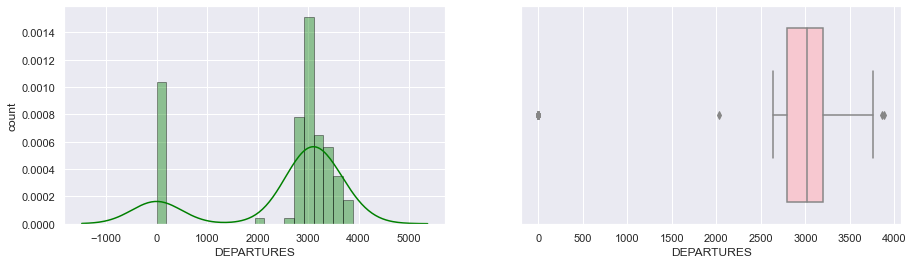

HOURS



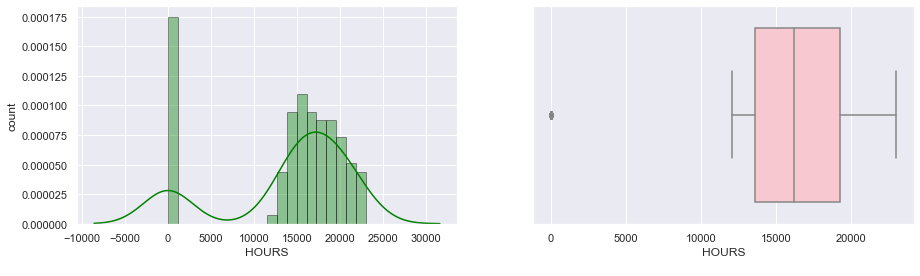

KILOMETRE
(TH)


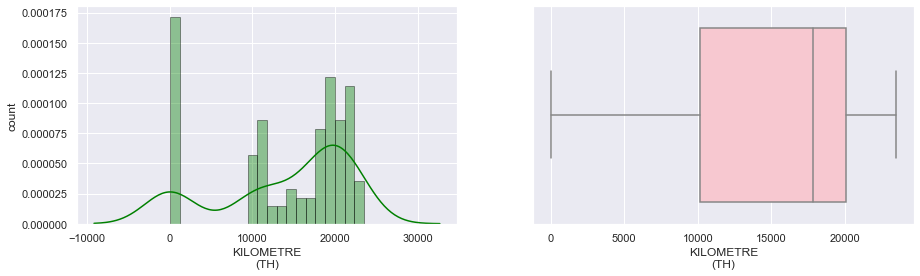

PASSENGERS CARRIED



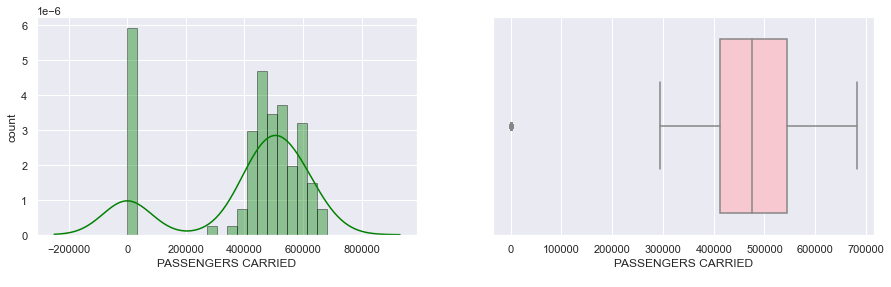

PASSENGER KMS.PERFORMED
(TH)


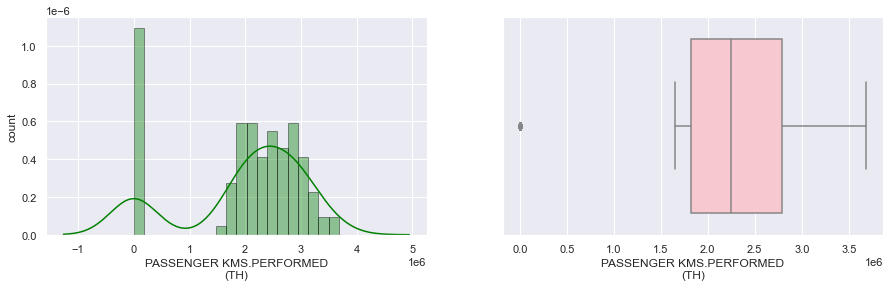

AVAILABLE SEAT KILOMETRE
(TH)


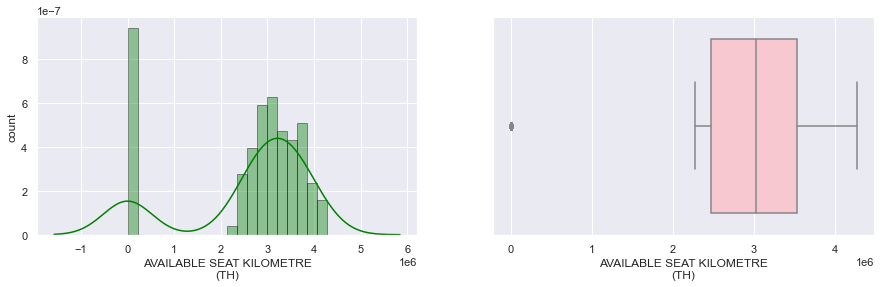

 PAX.LOAD FACTOR (IN %)


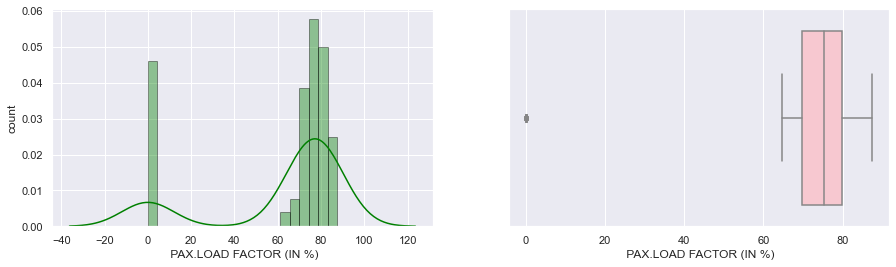

In [31]:
for col in df_flight.select_dtypes(include=np.number).columns.tolist():
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.distplot(a=df_flight[col], bins=20, color='green',
             hist_kws={"edgecolor": 'black'})
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_flight[col], color='pink')
    plt.show()

In [ ]:
## Let us investigate why departures were close to 0? 

In [33]:
df_flight[df_flight['DEPARTURES\n']<100]

,Month,DEPARTURES\n,HOURS\n,KILOMETRE\n(TH),PASSENGERS CARRIED\n,PASSENGER KMS.PERFORMED\n(TH),AVAILABLE SEAT KILOMETRE\n(TH),PAX.LOAD FACTOR (IN %),FY
84,APR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
85,MAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
86,JUNE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
87,JULY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
88,AUG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
89,SEP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
90,OCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
91,NOV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
92,DEC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
93,JAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21


In [ ]:
## Ah. got it!! Due to the COVID 19 pandemic, all flights were closed. So, this explains the zero departures.

In [36]:
df_flight[df_flight['KILOMETRE\n(TH)']<100]

,Month,DEPARTURES\n,HOURS\n,KILOMETRE\n(TH),PASSENGERS CARRIED\n,PASSENGER KMS.PERFORMED\n(TH),AVAILABLE SEAT KILOMETRE\n(TH),PAX.LOAD FACTOR (IN %),FY
84,APR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
85,MAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
86,JUNE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
87,JULY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
88,AUG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
89,SEP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
90,OCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
91,NOV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
92,DEC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21
93,JAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FY21


In [ ]:
## This is the same reason why the flight distances are also zero for the year 2021-22.

In [ ]:
### Bivariate Analysis

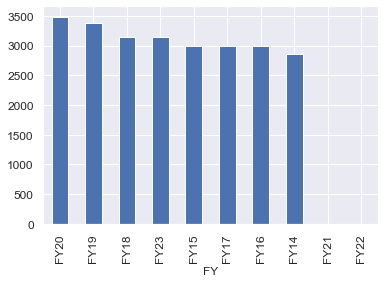

In [45]:
df_flight.groupby('FY')['DEPARTURES\n'].mean().sort_values(ascending=False).plot.bar(fontsize=12)
plt.show()

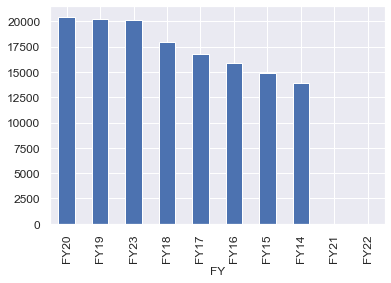

In [44]:
df_flight.groupby('FY')['HOURS\n'].mean().sort_values(ascending=False).plot.bar(fontsize=12)
plt.show()

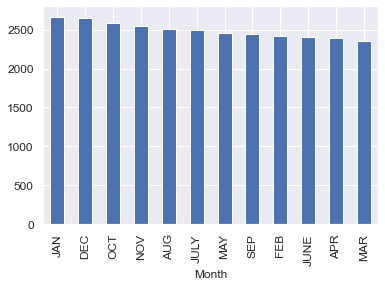

In [43]:
df_flight.groupby('Month')['DEPARTURES\n'].mean().sort_values(ascending=False).plot.bar(fontsize=12)
plt.show()

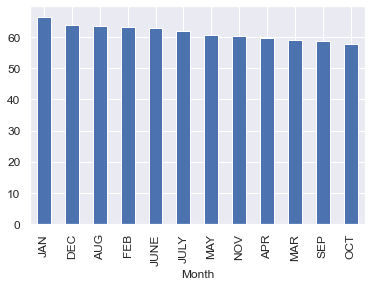

In [46]:
df_flight.groupby('Month')[' PAX.LOAD FACTOR (IN %)'].mean().sort_values(ascending=False).plot.bar(fontsize=12)
plt.show()

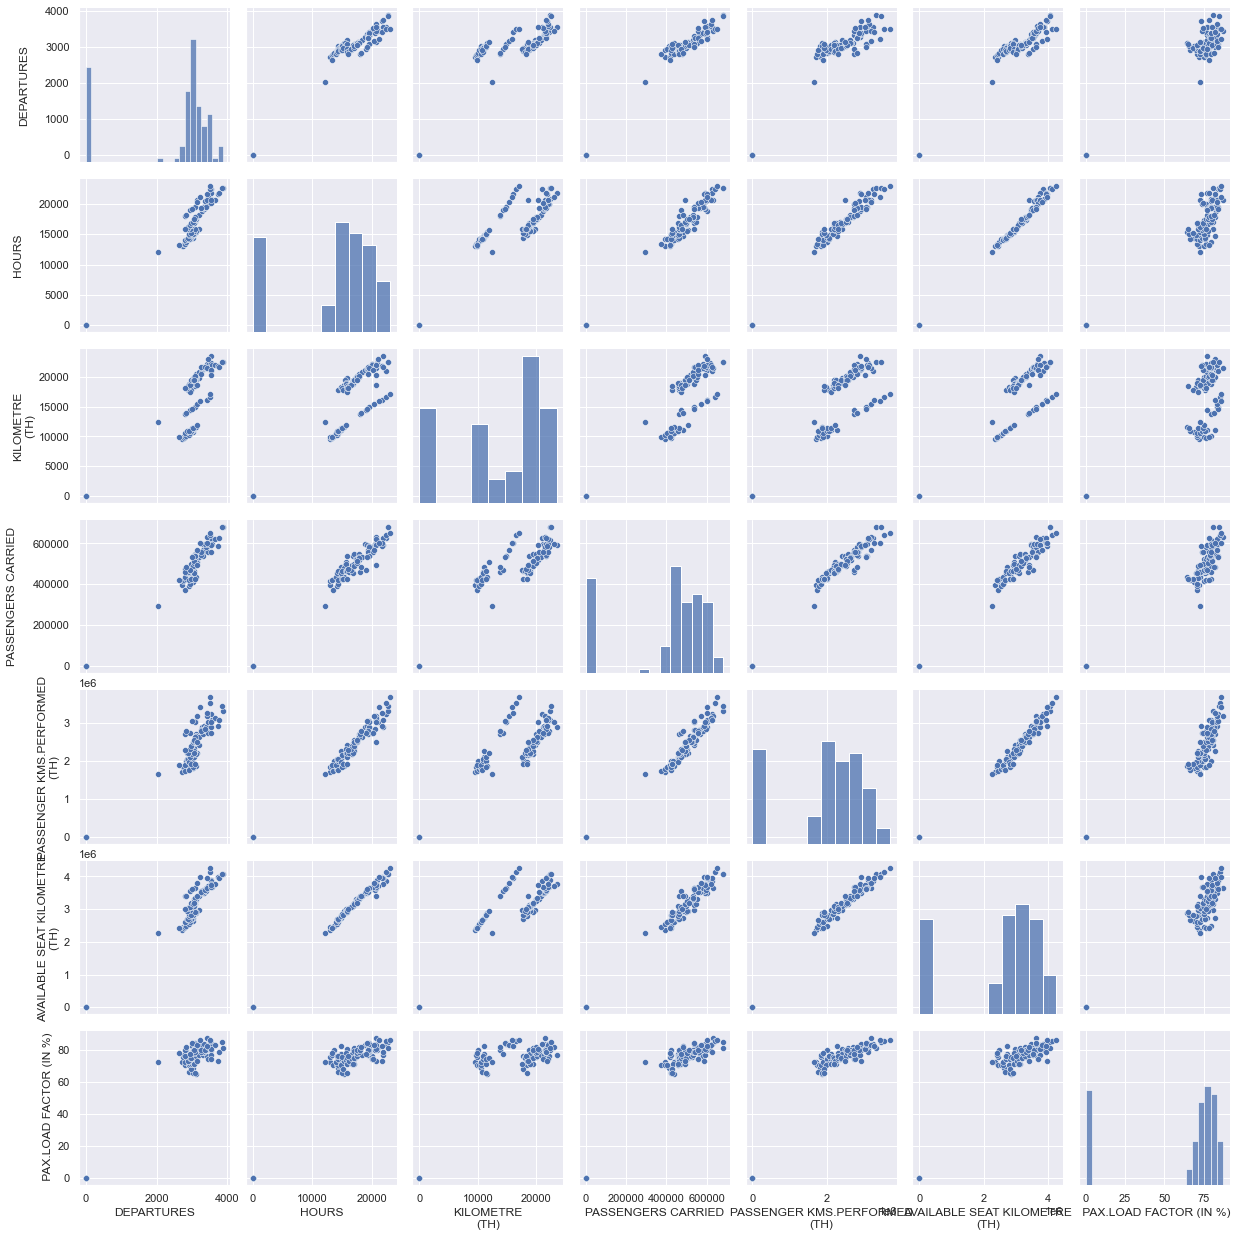

In [53]:
sns.pairplot(data=df_flight.drop(['Month','FY'],axis=1))
plt.show()